In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PROJECT_PATH = '../'
DATA_PATH = '/scratch/ceph/swei20/data/ae/dataset/test'
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
SZALAY_PATH = os.path.join("/scratch/ceph/szalay/swei20/AE", 'pca.h5')
sys.path.insert(0, PROJECT_PATH)

In [4]:
with h5py.File(PCA_PATH, 'r') as f:
    pc = f['flux'][()]
    pc_idx = f['flux_idx'][()]
    Fe_H = f['Fe_H'][()]
    log_g = f['log_g'][()]
    O_M = f['O_M'][()]
    C_M = f['C_M'][()]
    T_eff = f['T_eff'][()]
    wave = f['wave'][()]
    eigv = f['flux_eigv'][()]
    eigs = f['flux_eigs'][()]  

In [11]:
idx0 = np.digitize(8415, wave)
idx1 = np.digitize(8715, wave)

In [22]:
eigv0 = eigv[idx0:idx1, :]
wave0 = wave[idx0:idx1]

In [8]:
pc0 = pc[pc_idx]

In [16]:
flux_org = pc0.dot(eigv0.T)

In [17]:
flux_org.shape

(116614, 350)

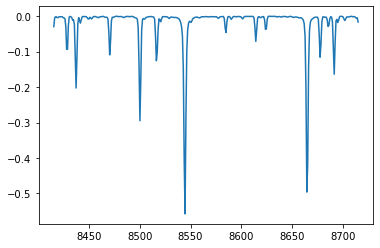

In [23]:
plt.plot(wave0, flux_org[0])

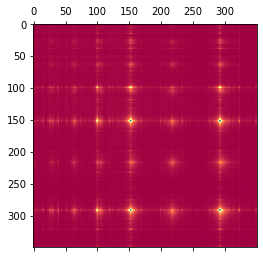

In [37]:
cov = flux_org.T.dot(flux_org)
plt.matshow(abs(cov), cmap="Spectral")

In [39]:
_,s,v = np.linalg.svd(cov)
v=v.T

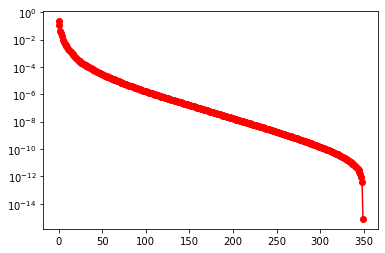

In [32]:
plt.plot(1-np.cumsum(s)/np.sum(s), 'ro-')
plt.yscale('log')

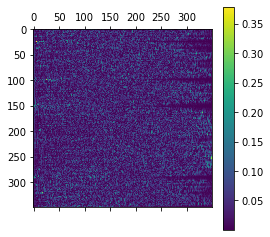

In [42]:
plt.matshow(abs(v))
plt.colorbar()

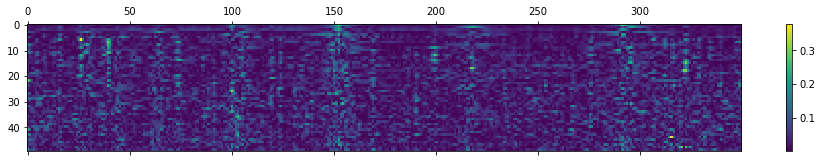

In [44]:
plt.matshow(abs(v[:,:50].T),aspect="auto")
plt.colorbar()

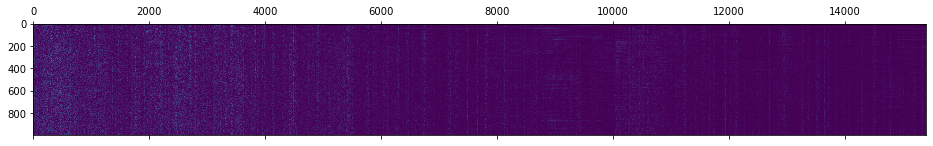

In [46]:
plt.matshow(abs(eigv.T), aspect="auto")

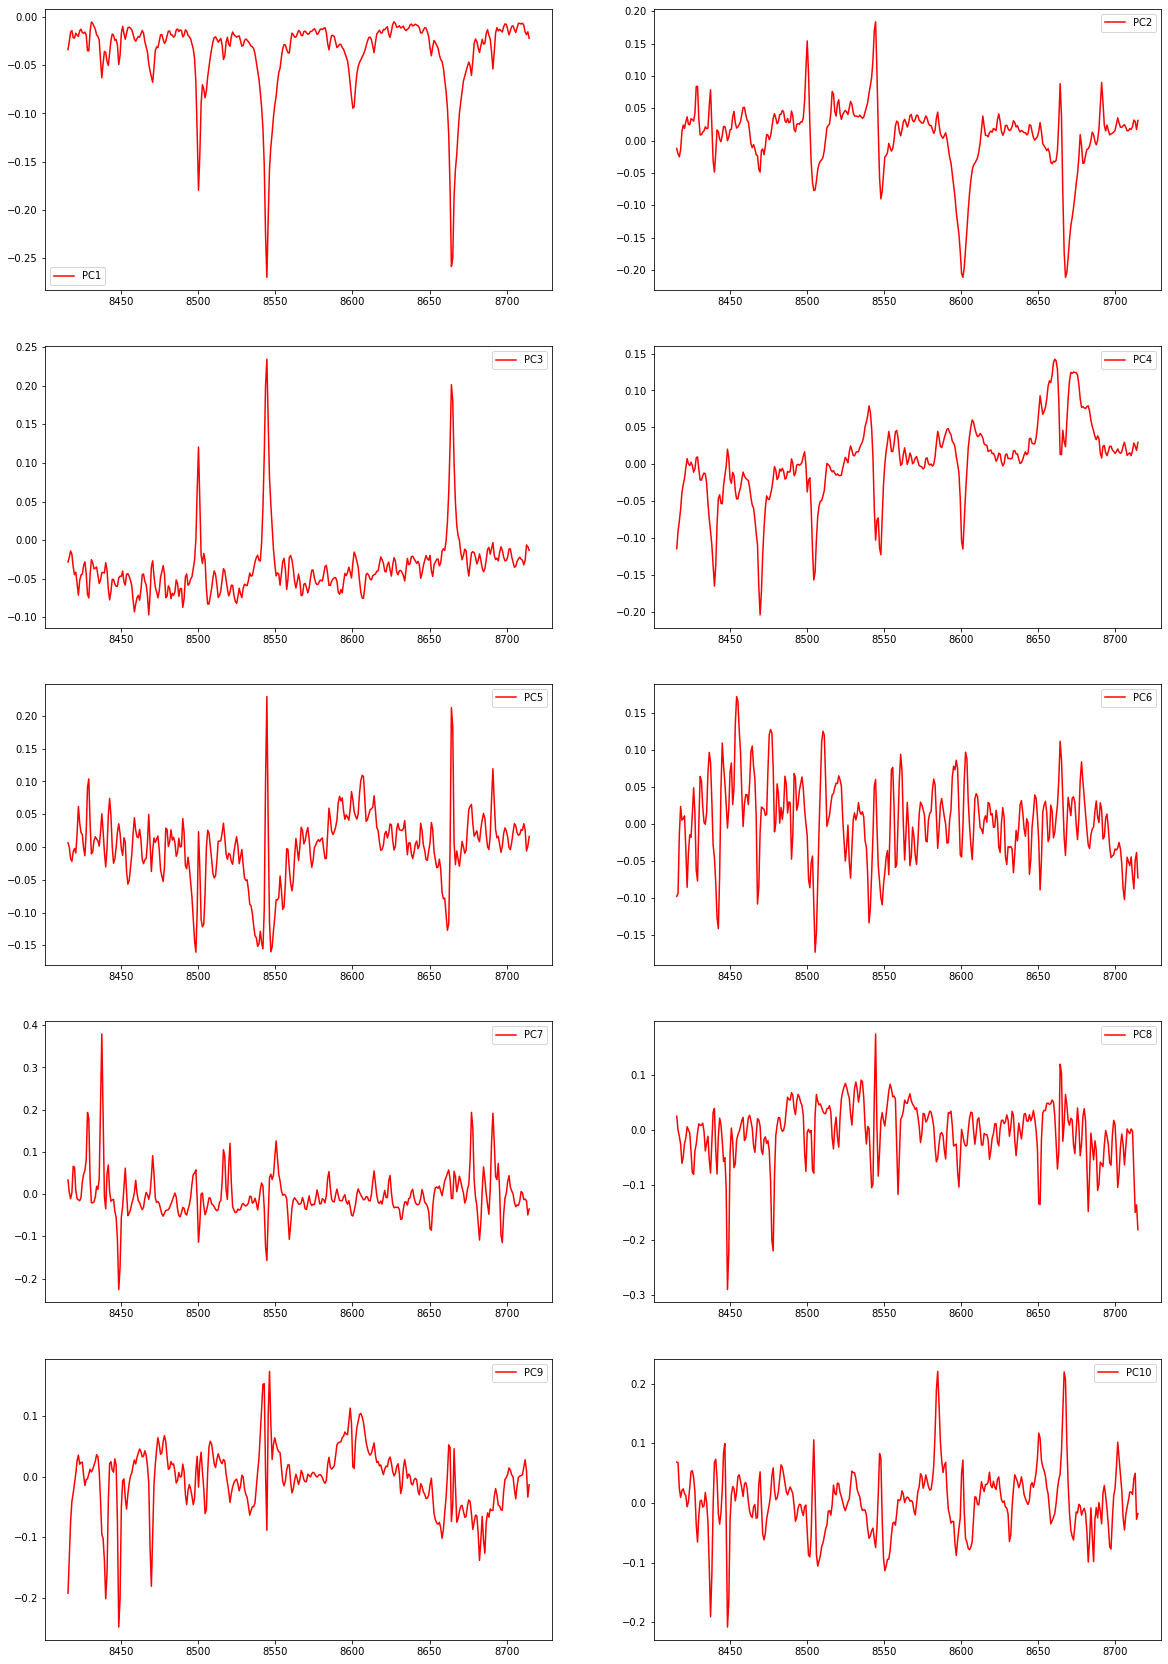

In [52]:
f, axs = plt.subplots(4,2, figsize=(20,30), facecolor="w")
for ii , ax in enumerate(axs.flatten()):
    ax.plot(wave0,v[:,ii], c='r', label=f"PC{ii+1}")  
    ax.legend()
# f.suptitle("SVD on wave 8415-8715")
f.savefig("./SVD_Ca.png")

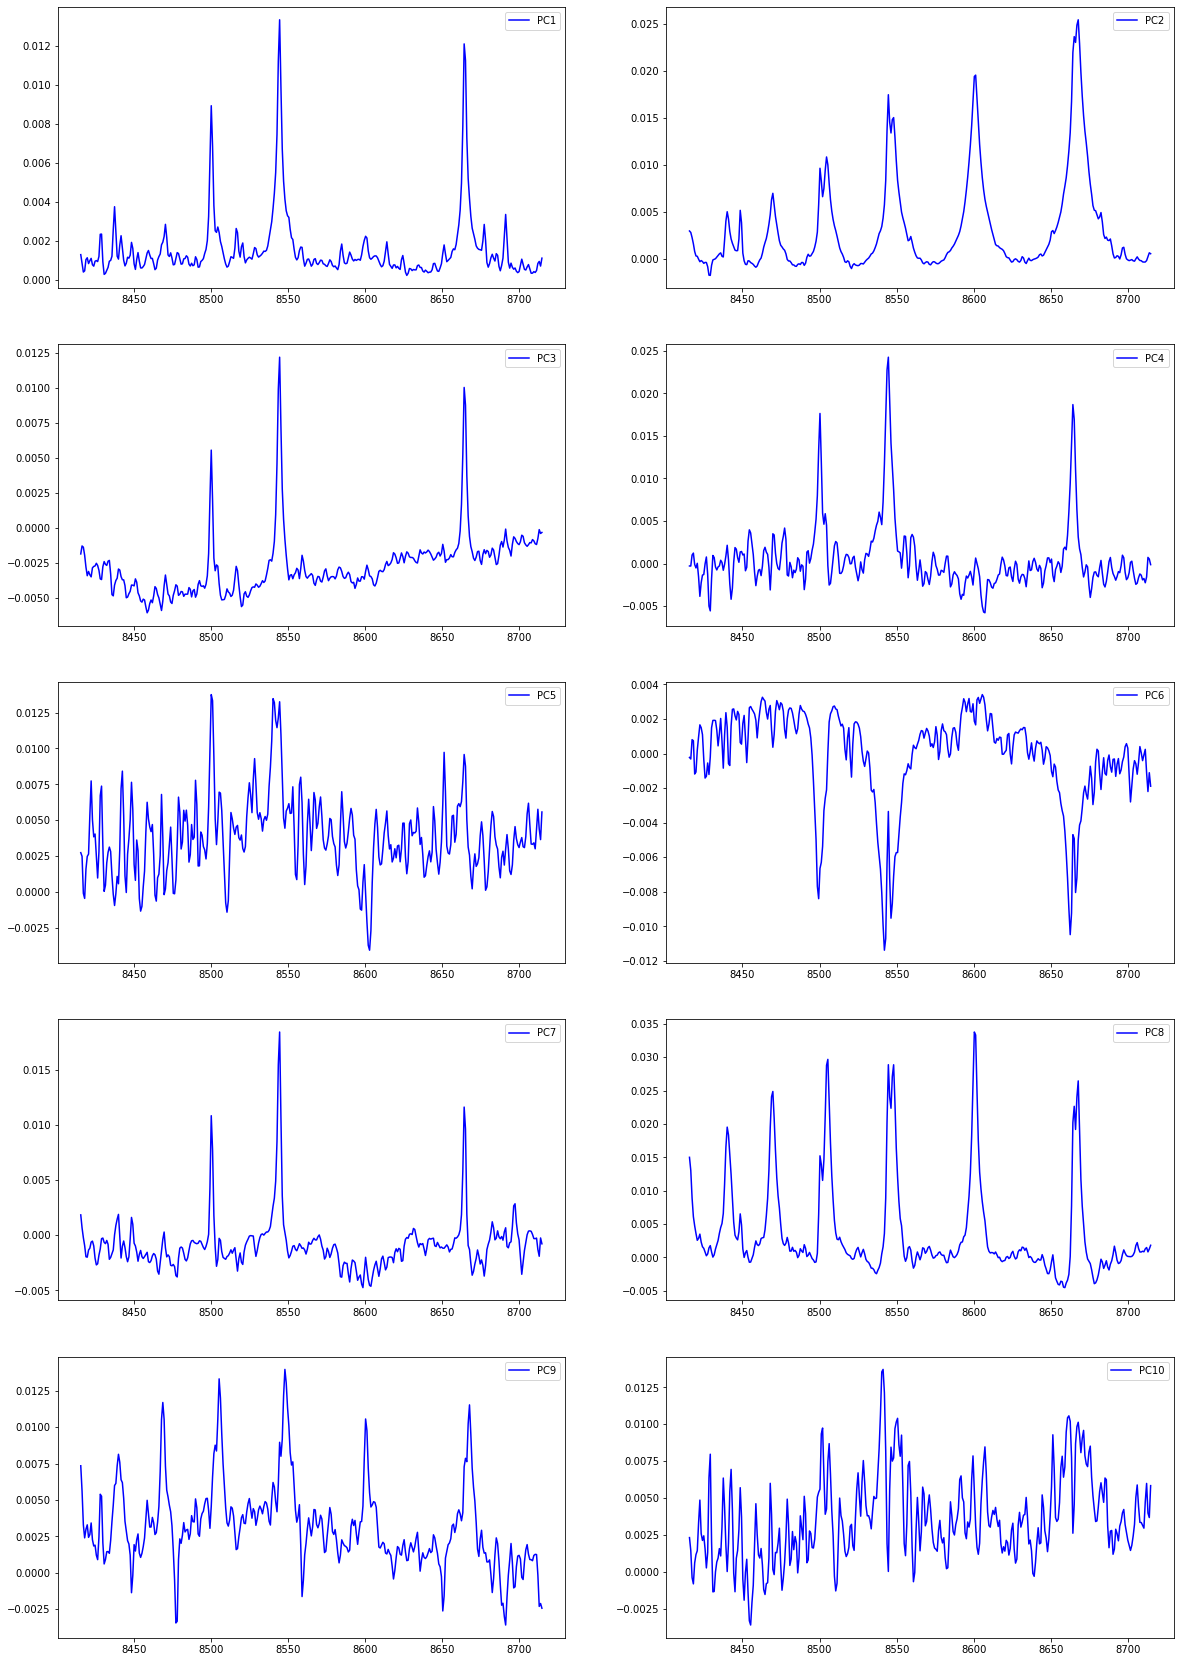

In [56]:

f, axs = plt.subplots(5,2, figsize=(20,30))
for ii , ax in enumerate(axs.flatten()):
    ax.plot(wave0,eigv[idx0:idx1,ii],  c='b', label=f"PC{ii+1}")
    ax.legend()
# f.suptitle("SVD on wave 8415-8715")
f.savefig("./SVD_all.png")